In [2]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

## LOADING DATASET

In [3]:
import pandas as pd
data = pd.read_csv("D:\Sem 4\ml&ai\ml project\supermarket_sales - Sheet1.csv")
data

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyle       46.33         7  16.2155   340.5255   
3         Health and beauty       58.22         8  23.2880   489.0480   
4         Sports and travel       86.31         7  30.2085   634.3785   
..                      ...         ...       ...      ...        ...   
995       Health and beauty       40.35         1   2.0175    42.3675   
996      Home and lifestyle       97.38        10  48.6900  1022.4900   
997      Food and beverages       31.84         1   1.5920    33.4320   
998      Home and lifestyle       65.82         1   3.2910    69.1110   
999     Fashion accessories       88.34         7  30.9190   649.2990   

          Date   Time      Payment    cogs  gross margin percentage  \
0     1/5/2019  13:08      Ewallet  522.83                 4.761905   
1     3/8/2019  10:29         Cash   76.40                 4.761905   
2     3/3/2019  13:23  Credit card  324.31                 4.761905   
3    1/27/2019  20:33      Ewallet  465.76                 4.761905   
4     2/8/2019  10:37      Ewallet  604.17                 4.761905   
..         ...    ...          ...     ...                      ...   
995  1/29/2019  13:46      Ewallet   40.35                 4.761905   
996   3/2/2019  17:16      Ewallet  973.80                 4.761905   
997   2/9/2019  13:22         Cash   31.84                 4.761905   
998  2/22/2019  15:33         Cash   65.82                 4.761905   
999  2/18/2019  13:28         Cash  618.38                 4.761905   

     gross income  Rating  
0         26.1415     9.1  
1          3.8200     9.6  
2         16.2155     7.4  
3         23.2880     8.4  
4         30.2085     5.3  
..            ...     ...  
995        2.0175     6.2  
996       48.6900     4.4  
997        1.5920     7.7  
998        3.2910     4.1  
999       30.9190     6.6  

[1000 rows x 17 columns]

In [4]:
data.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [5]:
data.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875     5.50000  
50%               4.761905e+00     12.088000     7.00000  
75%               4.761905e+00     22.445250     8.50000  
max               4.761905e+00     49.650000    10.00000

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
data.shape

(1000, 17)

In [8]:
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [9]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [10]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [11]:
data.isnull().any()

Invoice ID                 False
Branch                     False
City                       False
Customer type              False
Gender                     False
Product line               False
Unit price                 False
Quantity                   False
Tax 5%                     False
Total                      False
Date                       False
Time                       False
Payment                    False
cogs                       False
gross margin percentage    False
gross income               False
Rating                     False
dtype: bool

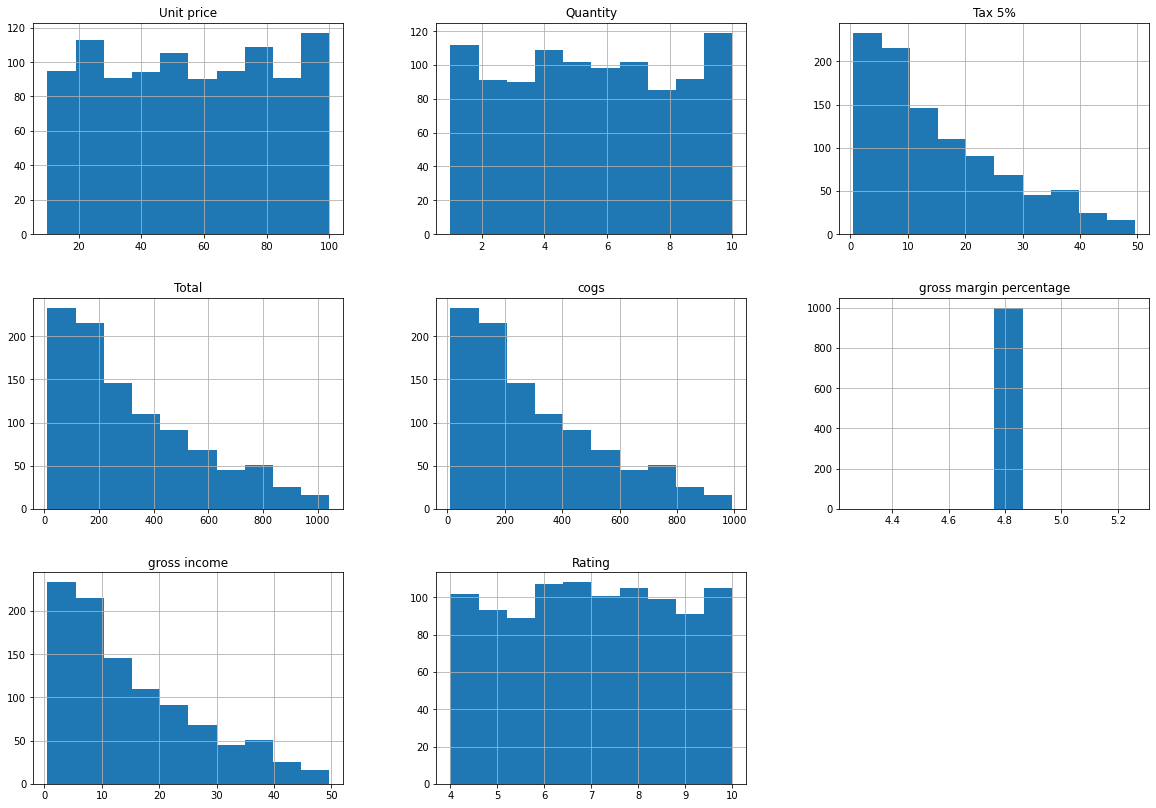

In [12]:
import matplotlib.pyplot as plt

data.hist(figsize=(20,14))
plt.show()

In [13]:
data.corr()

Unit price  Quantity    Tax 5%     Total      cogs  \
Unit price                 1.000000  0.010778  0.633962  0.633962  0.633962   
Quantity                   0.010778  1.000000  0.705510  0.705510  0.705510   
Tax 5%                     0.633962  0.705510  1.000000  1.000000  1.000000   
Total                      0.633962  0.705510  1.000000  1.000000  1.000000   
cogs                       0.633962  0.705510  1.000000  1.000000  1.000000   
gross margin percentage         NaN       NaN       NaN       NaN       NaN   
gross income               0.633962  0.705510  1.000000  1.000000  1.000000   
Rating                    -0.008778 -0.015815 -0.036442 -0.036442 -0.036442   

                         gross margin percentage  gross income    Rating  
Unit price                                   NaN      0.633962 -0.008778  
Quantity                                     NaN      0.705510 -0.015815  
Tax 5%                                       NaN      1.000000 -0.036442  
Total                                        NaN      1.000000 -0.036442  
cogs                                         NaN      1.000000 -0.036442  
gross margin percentage                      NaN           NaN       NaN  
gross income                                 NaN      1.000000 -0.036442  
Rating                                       NaN     -0.036442  1.000000

<AxesSubplot:>

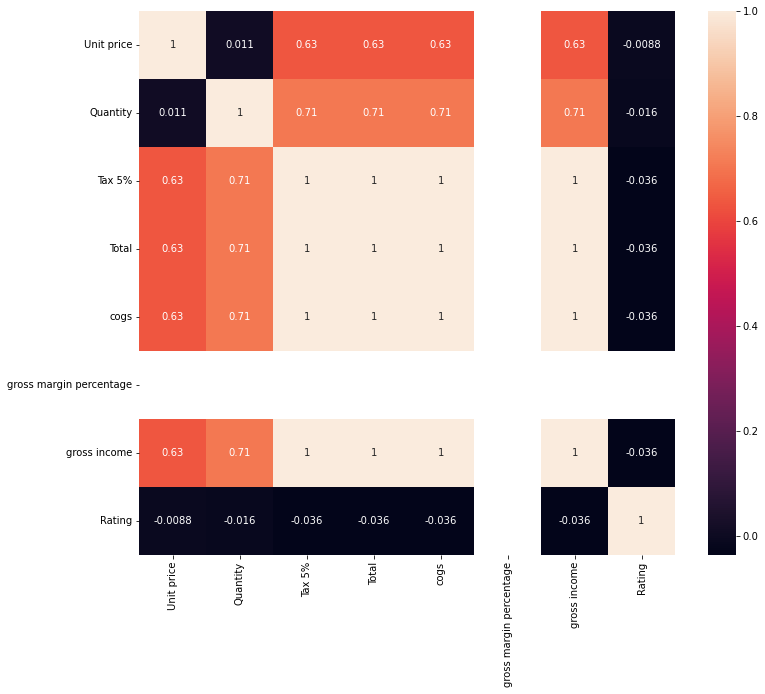

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,10))
sns.heatmap(data.corr(), annot =True)

<AxesSubplot:xlabel='gross income'>

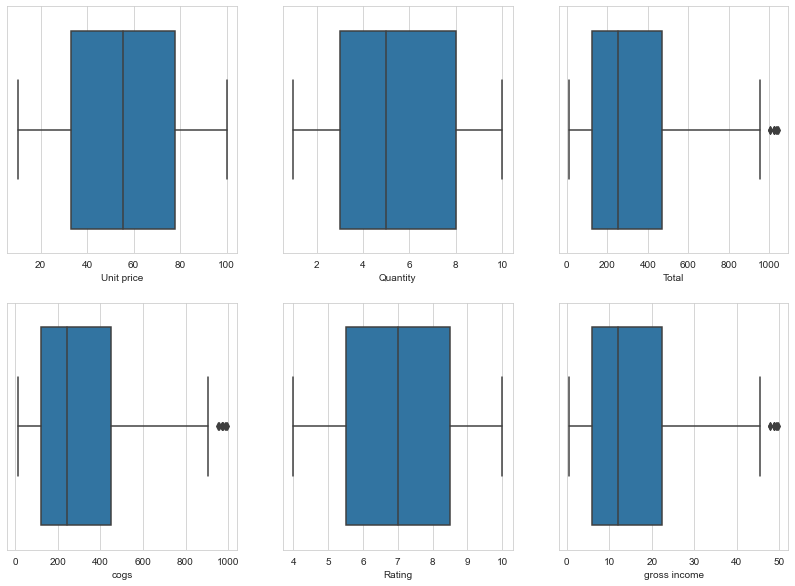

In [15]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Unit price',data=data)
plt.subplot(2,3,2)
sns.boxplot(x='Quantity',data=data)
plt.subplot(2,3,3)
sns.boxplot(x='Total',data=data)
plt.subplot(2,3,4)
sns.boxplot(x='cogs',data=data)
plt.subplot(2,3,5)
sns.boxplot(x='Rating',data=data)
plt.subplot(2,3,6)
sns.boxplot(x='gross income',data=data)

In [16]:
# Importing
import sklearn

import pandas as pd
 
# Load the dataset
data = pd.read_csv("D:\Sem 4\ml&ai\ml project\supermarket_sales - Sheet1.csv")
 
def outliers(data, feature):
    Q1= data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(data, "Total")
print("Upper limit: ", upper)
print("Lower limit: ", lower)


Upper limit:  991.7420625
Lower limit:  -395.9694375


In [17]:
data[(data['Total'] < lower) | (data['Total'] > upper)]

Invoice ID Branch       City Customer type  Gender         Product line  \
166  234-65-2137      C  Naypyitaw        Normal    Male   Home and lifestyle   
167  687-47-8271      A     Yangon        Normal    Male  Fashion accessories   
350  860-79-0874      C  Naypyitaw        Member  Female  Fashion accessories   
357  554-42-2417      C  Naypyitaw        Normal  Female    Sports and travel   
422  271-88-8734      C  Naypyitaw        Member  Female  Fashion accessories   
557  283-26-5248      C  Naypyitaw        Member  Female   Food and beverages   
699  751-41-9720      C  Naypyitaw        Normal    Male   Home and lifestyle   
792  744-16-7898      B   Mandalay        Normal  Female   Home and lifestyle   
996  303-96-2227      B   Mandalay        Normal  Female   Home and lifestyle   

     Unit price  Quantity  Tax 5%     Total       Date   Time      Payment  \
166       95.58        10  47.790  1003.590  1/16/2019  13:32         Cash   
167       98.98        10  49.490  1039.290   2/8/2019  16:20  Credit card   
350       99.30        10  49.650  1042.650  2/15/2019  14:53  Credit card   
357       95.44        10  47.720  1002.120   1/9/2019  13:45         Cash   
422       97.21        10  48.605  1020.705   2/8/2019  13:00  Credit card   
557       98.52        10  49.260  1034.460  1/30/2019  20:23      Ewallet   
699       97.50        10  48.750  1023.750  1/12/2019  16:18      Ewallet   
792       97.37        10  48.685  1022.385  1/15/2019  13:48  Credit card   
996       97.38        10  48.690  1022.490   3/2/2019  17:16      Ewallet   

      cogs  gross margin percentage  gross income  Rating  
166  955.8                 4.761905        47.790     4.8  
167  989.8                 4.761905        49.490     8.7  
350  993.0                 4.761905        49.650     6.6  
357  954.4                 4.761905        47.720     5.2  
422  972.1                 4.761905        48.605     8.7  
557  985.2                 4.761905        49.260     4.5  
699  975.0                 4.761905        48.750     8.0  
792  973.7                 4.761905        48.685     4.9  
996  973.8                 4.761905        48.690     4.4

In [18]:
new_data = data[(data['Total'] > lower) & (data['Total'] < upper)]
new_data

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
994  652-49-6720      C  Naypyitaw        Member  Female   
995  233-67-5758      C  Naypyitaw        Normal    Male   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%     Total  \
0         Health and beauty       74.69         7  26.1415  548.9715   
1    Electronic accessories       15.28         5   3.8200   80.2200   
2        Home and lifestyle       46.33         7  16.2155  340.5255   
3         Health and beauty       58.22         8  23.2880  489.0480   
4         Sports and travel       86.31         7  30.2085  634.3785   
..                      ...         ...       ...      ...       ...   
994  Electronic accessories       60.95         1   3.0475   63.9975   
995       Health and beauty       40.35         1   2.0175   42.3675   
997      Food and beverages       31.84         1   1.5920   33.4320   
998      Home and lifestyle       65.82         1   3.2910   69.1110   
999     Fashion accessories       88.34         7  30.9190  649.2990   

          Date   Time      Payment    cogs  gross margin percentage  \
0     1/5/2019  13:08      Ewallet  522.83                 4.761905   
1     3/8/2019  10:29         Cash   76.40                 4.761905   
2     3/3/2019  13:23  Credit card  324.31                 4.761905   
3    1/27/2019  20:33      Ewallet  465.76                 4.761905   
4     2/8/2019  10:37      Ewallet  604.17                 4.761905   
..         ...    ...          ...     ...                      ...   
994  2/18/2019  11:40      Ewallet   60.95                 4.761905   
995  1/29/2019  13:46      Ewallet   40.35                 4.761905   
997   2/9/2019  13:22         Cash   31.84                 4.761905   
998  2/22/2019  15:33         Cash   65.82                 4.761905   
999  2/18/2019  13:28         Cash  618.38                 4.761905   

     gross income  Rating  
0         26.1415     9.1  
1          3.8200     9.6  
2         16.2155     7.4  
3         23.2880     8.4  
4         30.2085     5.3  
..            ...     ...  
994        3.0475     5.9  
995        2.0175     6.2  
997        1.5920     7.7  
998        3.2910     4.1  
999       30.9190     6.6  

[991 rows x 17 columns]

In [19]:
import sklearn

import pandas as pd
 

def outliers(new_data, feature):
    Q1= new_data[feature].quantile(0.25)
    Q3 = new_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(new_data, "cogs")
print("Upper limit: ", upper)
print("Lower limit: ", lower)

Upper limit:  931.8249999999998
Lower limit:  -372.93499999999995


In [20]:
new_data[(new_data['cogs'] < lower) | (new_data['cogs'] > upper)]

Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []

In [21]:
new1_data = new_data[(new_data['Total'] > lower) & (new_data['Total'] < upper)]
new1_data

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
994  652-49-6720      C  Naypyitaw        Member  Female   
995  233-67-5758      C  Naypyitaw        Normal    Male   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%     Total  \
0         Health and beauty       74.69         7  26.1415  548.9715   
1    Electronic accessories       15.28         5   3.8200   80.2200   
2        Home and lifestyle       46.33         7  16.2155  340.5255   
3         Health and beauty       58.22         8  23.2880  489.0480   
4         Sports and travel       86.31         7  30.2085  634.3785   
..                      ...         ...       ...      ...       ...   
994  Electronic accessories       60.95         1   3.0475   63.9975   
995       Health and beauty       40.35         1   2.0175   42.3675   
997      Food and beverages       31.84         1   1.5920   33.4320   
998      Home and lifestyle       65.82         1   3.2910   69.1110   
999     Fashion accessories       88.34         7  30.9190  649.2990   

          Date   Time      Payment    cogs  gross margin percentage  \
0     1/5/2019  13:08      Ewallet  522.83                 4.761905   
1     3/8/2019  10:29         Cash   76.40                 4.761905   
2     3/3/2019  13:23  Credit card  324.31                 4.761905   
3    1/27/2019  20:33      Ewallet  465.76                 4.761905   
4     2/8/2019  10:37      Ewallet  604.17                 4.761905   
..         ...    ...          ...     ...                      ...   
994  2/18/2019  11:40      Ewallet   60.95                 4.761905   
995  1/29/2019  13:46      Ewallet   40.35                 4.761905   
997   2/9/2019  13:22         Cash   31.84                 4.761905   
998  2/22/2019  15:33         Cash   65.82                 4.761905   
999  2/18/2019  13:28         Cash  618.38                 4.761905   

     gross income  Rating  
0         26.1415     9.1  
1          3.8200     9.6  
2         16.2155     7.4  
3         23.2880     8.4  
4         30.2085     5.3  
..            ...     ...  
994        3.0475     5.9  
995        2.0175     6.2  
997        1.5920     7.7  
998        3.2910     4.1  
999       30.9190     6.6  

[980 rows x 17 columns]

In [22]:
import sklearn

import pandas as pd
 

def outliers(new1_data, feature):
    Q1= new1_data[feature].quantile(0.25)
    Q3 = new1_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit
upper, lower = outliers(new1_data, "gross income")
print("Upper limit: ", upper)
print("Lower limit: ", lower)

Upper limit:  45.8190625
Lower limit:  -18.2374375


In [23]:
new1_data[(new1_data['gross income'] < lower) | (new1_data['gross income'] > upper)]

Empty DataFrame
Columns: [Invoice ID, Branch, City, Customer type, Gender, Product line, Unit price, Quantity, Tax 5%, Total, Date, Time, Payment, cogs, gross margin percentage, gross income, Rating]
Index: []

In [24]:
new2_data = new1_data[(new1_data['gross income'] > lower) & (new1_data['gross income'] < upper)]
new2_data

Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
994  652-49-6720      C  Naypyitaw        Member  Female   
995  233-67-5758      C  Naypyitaw        Normal    Male   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%     Total  \
0         Health and beauty       74.69         7  26.1415  548.9715   
1    Electronic accessories       15.28         5   3.8200   80.2200   
2        Home and lifestyle       46.33         7  16.2155  340.5255   
3         Health and beauty       58.22         8  23.2880  489.0480   
4         Sports and travel       86.31         7  30.2085  634.3785   
..                      ...         ...       ...      ...       ...   
994  Electronic accessories       60.95         1   3.0475   63.9975   
995       Health and beauty       40.35         1   2.0175   42.3675   
997      Food and beverages       31.84         1   1.5920   33.4320   
998      Home and lifestyle       65.82         1   3.2910   69.1110   
999     Fashion accessories       88.34         7  30.9190  649.2990   

          Date   Time      Payment    cogs  gross margin percentage  \
0     1/5/2019  13:08      Ewallet  522.83                 4.761905   
1     3/8/2019  10:29         Cash   76.40                 4.761905   
2     3/3/2019  13:23  Credit card  324.31                 4.761905   
3    1/27/2019  20:33      Ewallet  465.76                 4.761905   
4     2/8/2019  10:37      Ewallet  604.17                 4.761905   
..         ...    ...          ...     ...                      ...   
994  2/18/2019  11:40      Ewallet   60.95                 4.761905   
995  1/29/2019  13:46      Ewallet   40.35                 4.761905   
997   2/9/2019  13:22         Cash   31.84                 4.761905   
998  2/22/2019  15:33         Cash   65.82                 4.761905   
999  2/18/2019  13:28         Cash  618.38                 4.761905   

     gross income  Rating  
0         26.1415     9.1  
1          3.8200     9.6  
2         16.2155     7.4  
3         23.2880     8.4  
4         30.2085     5.3  
..            ...     ...  
994        3.0475     5.9  
995        2.0175     6.2  
997        1.5920     7.7  
998        3.2910     4.1  
999       30.9190     6.6  

[980 rows x 17 columns]

Text(0.5, 1.0, 'After removing outliers in Total')

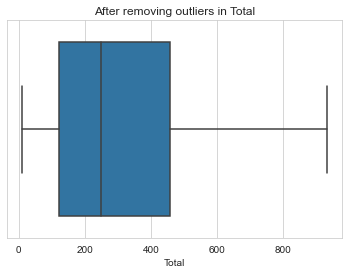

In [25]:

sns.boxplot(x='Total',data=new2_data)
plt.title('After removing outliers in Total')


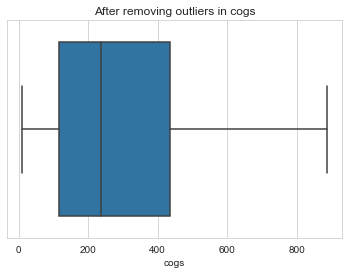

In [26]:
import seaborn as sns


sns.boxplot(x='cogs',data=new2_data)
plt.title('After removing outliers in cogs')





plt.show()

Text(0.5, 1.0, 'After removing outliers in gross income')

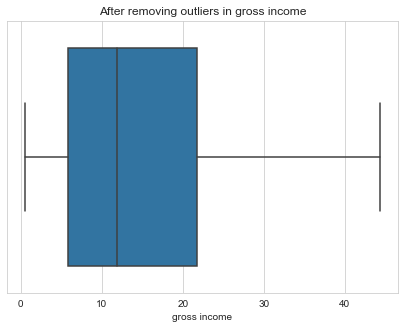

In [27]:
import seaborn as sns
plt.figure(figsize=(7,5))


sns.boxplot(x='gross income',data=new2_data)
plt.title('After removing outliers in gross income')


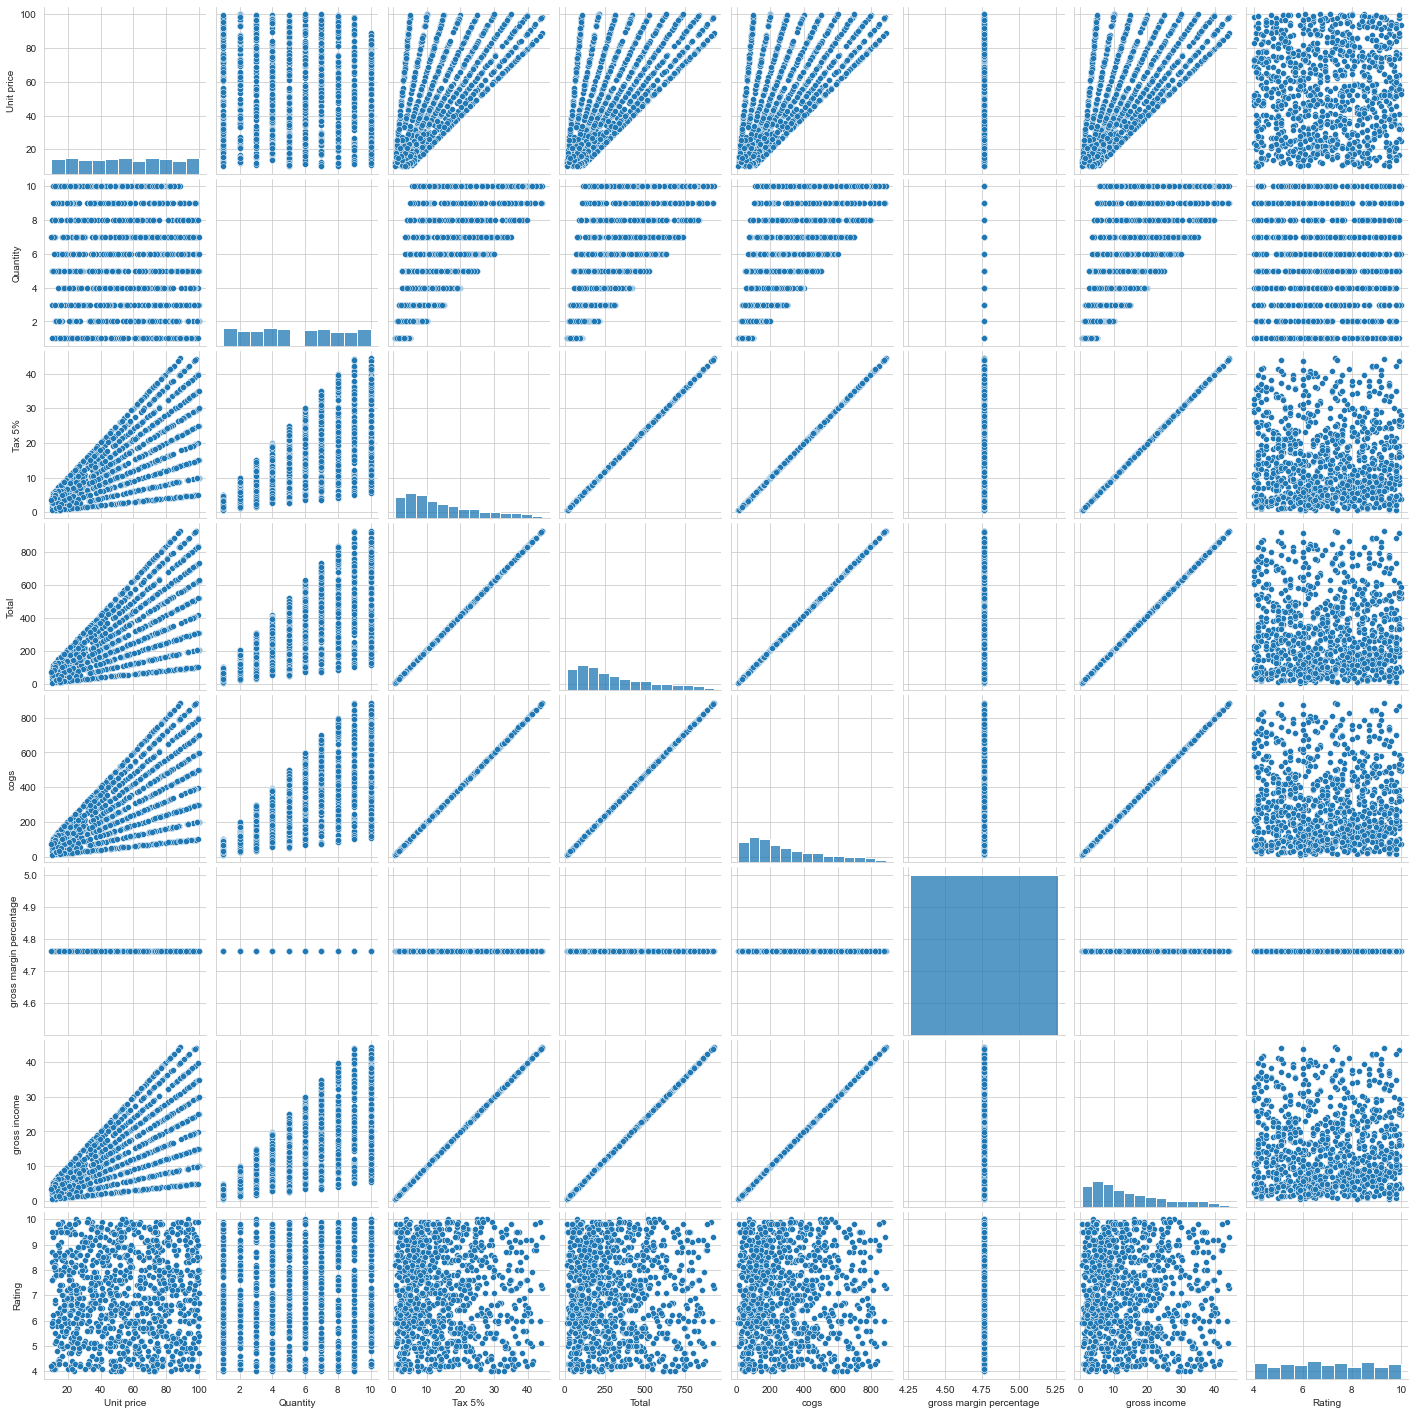

In [28]:
import seaborn as sns

sns.pairplot(data=new2_data)

<AxesSubplot:xlabel='Rating', ylabel='gross income'>

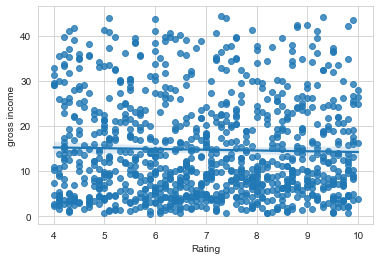

In [29]:
sns.regplot(x='Rating', y= 'gross income', data=new2_data)

<AxesSubplot:xlabel='Rating', ylabel='cogs'>

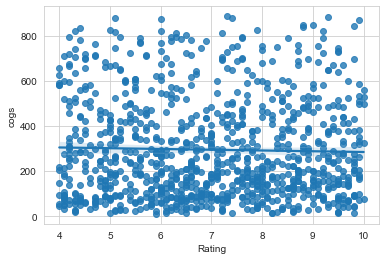

In [30]:
sns.regplot(x='Rating', y= 'cogs', data=new2_data)

<AxesSubplot:xlabel='Rating', ylabel='Total'>

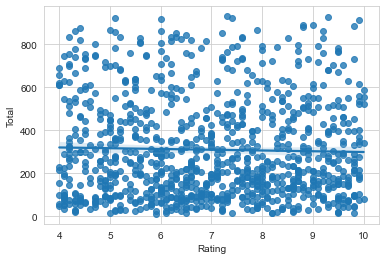

In [31]:
sns.regplot(x='Rating', y= 'Total', data=new2_data)

In [32]:
new2_data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

<AxesSubplot:xlabel='Rating', ylabel='Unit price'>

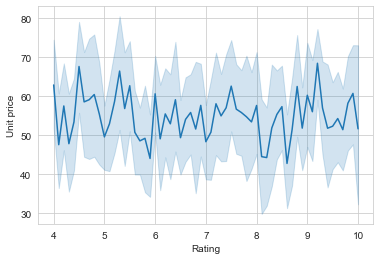

In [33]:
sns.lineplot(x='Rating', y= 'Unit price', data=new2_data)

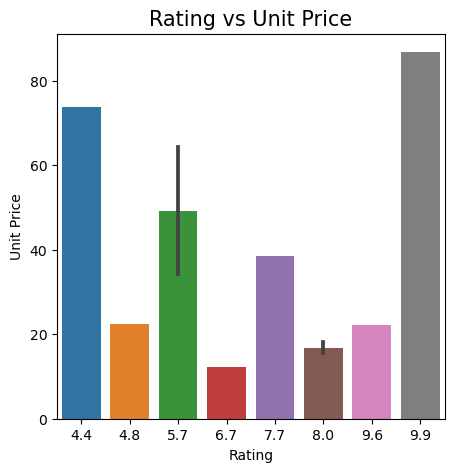

In [34]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Unit price", data=new2_data[170:180])
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

In [35]:
new2_data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

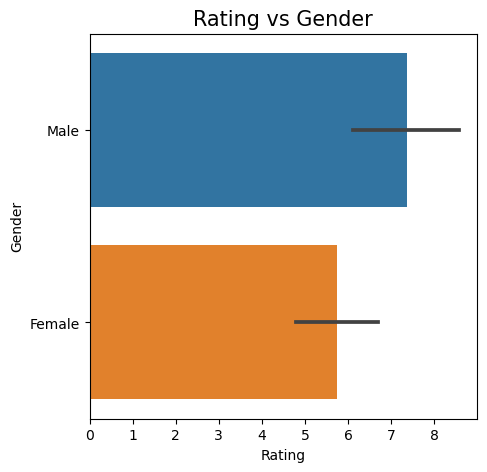

In [36]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Gender", data=new2_data[170:180])
plt.title("Rating vs Gender",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Gender")
plt.show()

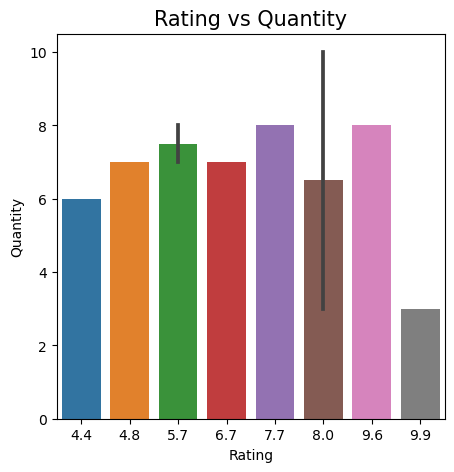

In [37]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Quantity", data=new2_data[170:180])
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()


In [38]:
list_1=list(new2_data.columns)

In [39]:
list_cate=[]
for i in list_1:
    if new2_data[i].dtype=='object':
        list_cate.append(i)

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [41]:
for i in list_cate:
    new2_data[i]=le.fit_transform(new2_data[i])

In [42]:
y=new2_data['Gender']
x=new2_data.drop('Gender',axis=1)


In [43]:
new2_data

Invoice ID  Branch  City  Customer type  Gender  Product line  \
0           799       0     2              0       0             3   
1           141       2     1              1       0             0   
2           642       0     2              1       1             4   
3            18       0     2              0       1             3   
4           331       0     2              1       1             5   
..          ...     ...   ...            ...     ...           ...   
994         678       2     1              0       0             0   
995         152       2     1              1       1             3   
997         754       0     2              0       1             2   
998         300       0     2              1       1             4   
999         917       0     2              0       0             1   

     Unit price  Quantity   Tax 5%     Total  Date  Time  Payment    cogs  \
0         74.69         7  26.1415  548.9715    26   146        2  522.83   
1         15.28         5   3.8200   80.2200    87    23        0   76.40   
2         46.33         7  16.2155  340.5255    81   155        1  324.31   
3         58.22         8  23.2880  489.0480    19   483        2  465.76   
4         86.31         7  30.2085  634.3785    57    29        2  604.17   
..          ...       ...      ...       ...   ...   ...      ...     ...   
994       60.95         1   3.0475   63.9975    40    79        2   60.95   
995       40.35         1   2.0175   42.3675    21   174        2   40.35   
997       31.84         1   1.5920   33.4320    58   154        0   31.84   
998       65.82         1   3.2910   69.1110    45   261        0   65.82   
999       88.34         7  30.9190  649.2990    40   160        0  618.38   

     gross margin percentage  gross income  Rating  
0                   4.761905       26.1415     9.1  
1                   4.761905        3.8200     9.6  
2                   4.761905       16.2155     7.4  
3                   4.761905       23.2880     8.4  
4                   4.761905       30.2085     5.3  
..                       ...           ...     ...  
994                 4.761905        3.0475     5.9  
995                 4.761905        2.0175     6.2  
997                 4.761905        1.5920     7.7  
998                 4.761905        3.2910     4.1  
999                 4.761905       30.9190     6.6  

[980 rows x 17 columns]

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [45]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

784
196
784
196


# MODELS


## 1. KNieghbors Classifier

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

Classification Report is:
               precision    recall  f1-score   support

           0       0.52      0.46      0.49       109
           1       0.41      0.47      0.44        87

    accuracy                           0.46       196
   macro avg       0.47      0.46      0.46       196
weighted avg       0.47      0.46      0.47       196

Confusion Matrix:
 [[50 59]
 [46 41]]
Training Score:
 66.45408163265306
Test Score:
 46.42857142857143


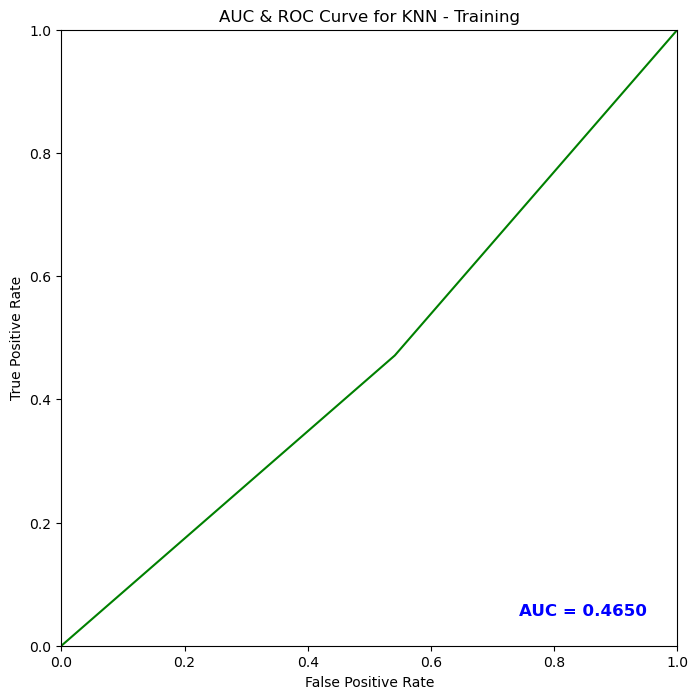

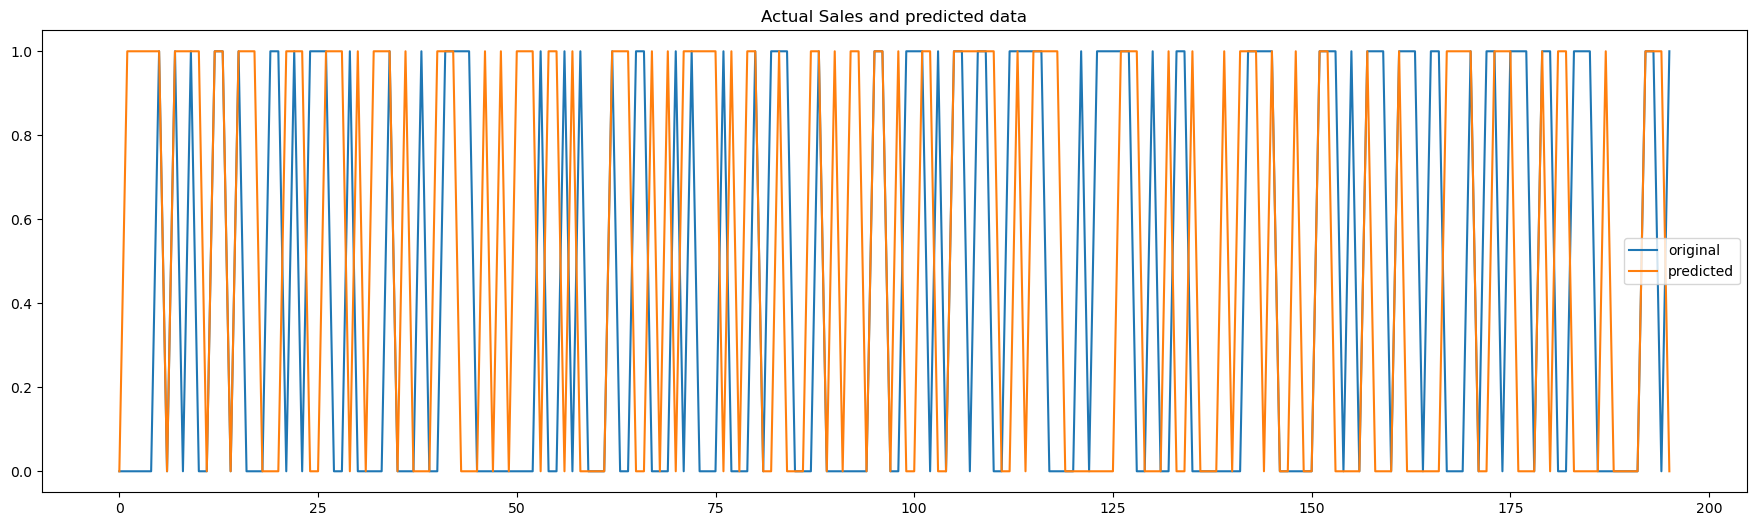

In [47]:
y1_pred=knn.predict(x_test)
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y1_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y1_pred))
print("Training Score:\n",knn.score(x_train,y_train)*100)
print("Test Score:\n",knn.score(x_test,y_test)*100)
auc = metrics.roc_auc_score(y_test, y1_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y1_pred)
# plt.subplot(2,3,1)
plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for KNN - Training")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

# auc = metrics.roc_auc_score(y_test, y1_pred)

# false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y1_pred)
# plt.subplot(2,3,1)
# plt.figure(figsize=(10, 8), dpi=100)
# plt.axis('scaled')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
# plt.title("AUC & ROC Curve for KNN - Testing")
# plt.plot(false_positive_rate, true_positive_rate, 'g')
# plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate"



plt.figure(figsize=(22,6), dpi=100)

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax,y1_pred, label="predicted")
plt.title("Actual Sales and predicted data")
plt.legend()

plt.show()





## 2. SVM

In [48]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

SVC()

Classification Report is:
               precision    recall  f1-score   support

           0       0.52      0.39      0.45       109
           1       0.42      0.54      0.47        87

    accuracy                           0.46       196
   macro avg       0.47      0.47      0.46       196
weighted avg       0.47      0.46      0.46       196

Confusion Matrix:
 [[43 66]
 [40 47]]
Training Score:
 57.14285714285714
Test Score:
 45.91836734693878


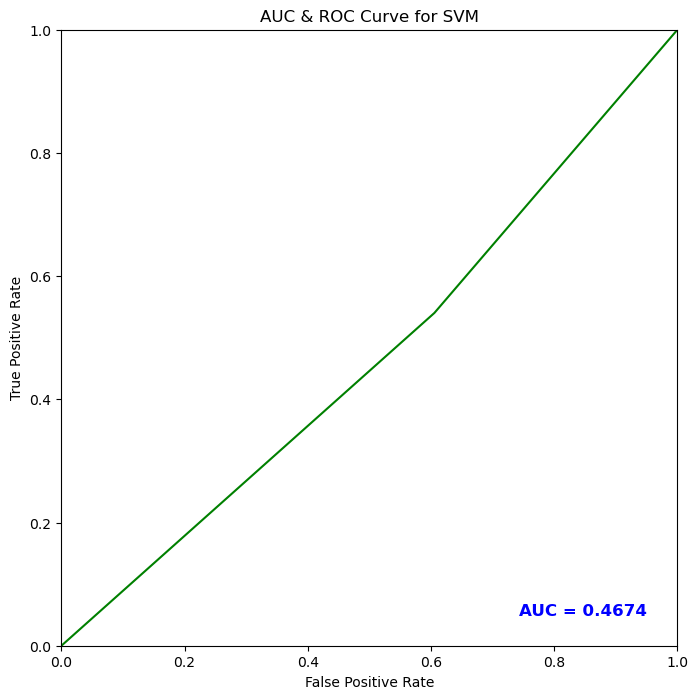

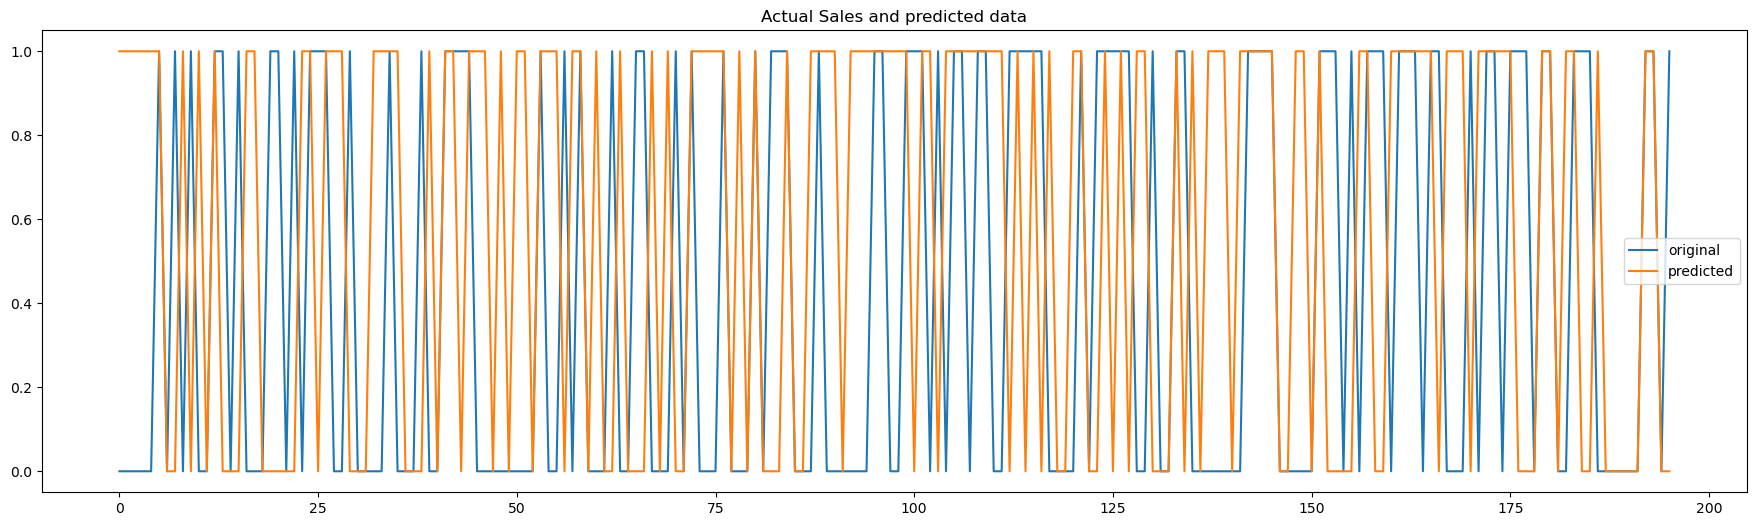

In [49]:
y2_pred=svc.predict(x_test)
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y2_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y2_pred))
print("Training Score:\n",svc.score(x_train,y_train)*100)
print("Test Score:\n",svc.score(x_test,y_test)*100)
auc = metrics.roc_auc_score(y_test, y2_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y2_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for SVM")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")



plt.figure(figsize=(22,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax,y2_pred, label="predicted")
plt.title("Actual Sales and predicted data")
plt.legend()
plt.show()






## 3. Naive Bayes

In [50]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

Classification Report is:
               precision    recall  f1-score   support

           0       0.52      0.36      0.42       109
           1       0.42      0.59      0.49        87

    accuracy                           0.46       196
   macro avg       0.47      0.47      0.46       196
weighted avg       0.48      0.46      0.45       196

Confusion Matrix:
 [[39 70]
 [36 51]]
Training Score:
 56.76020408163265
Test Score:
 45.91836734693878


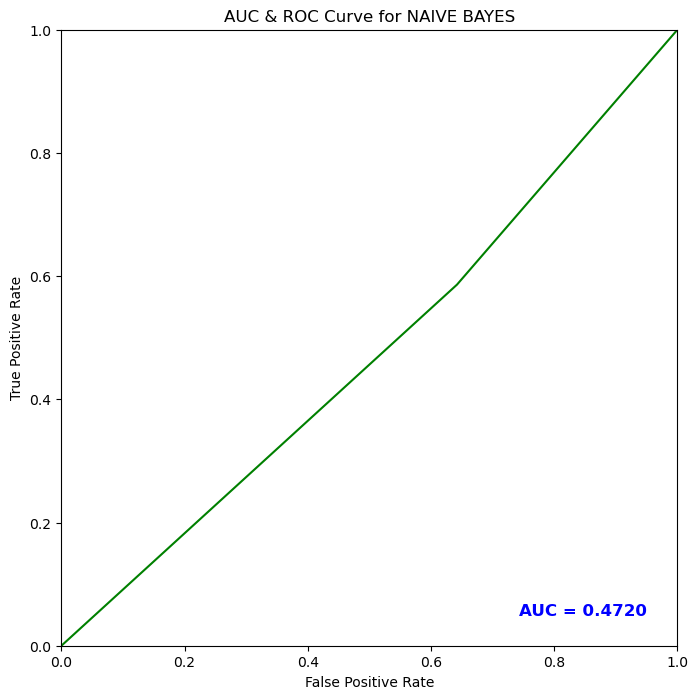

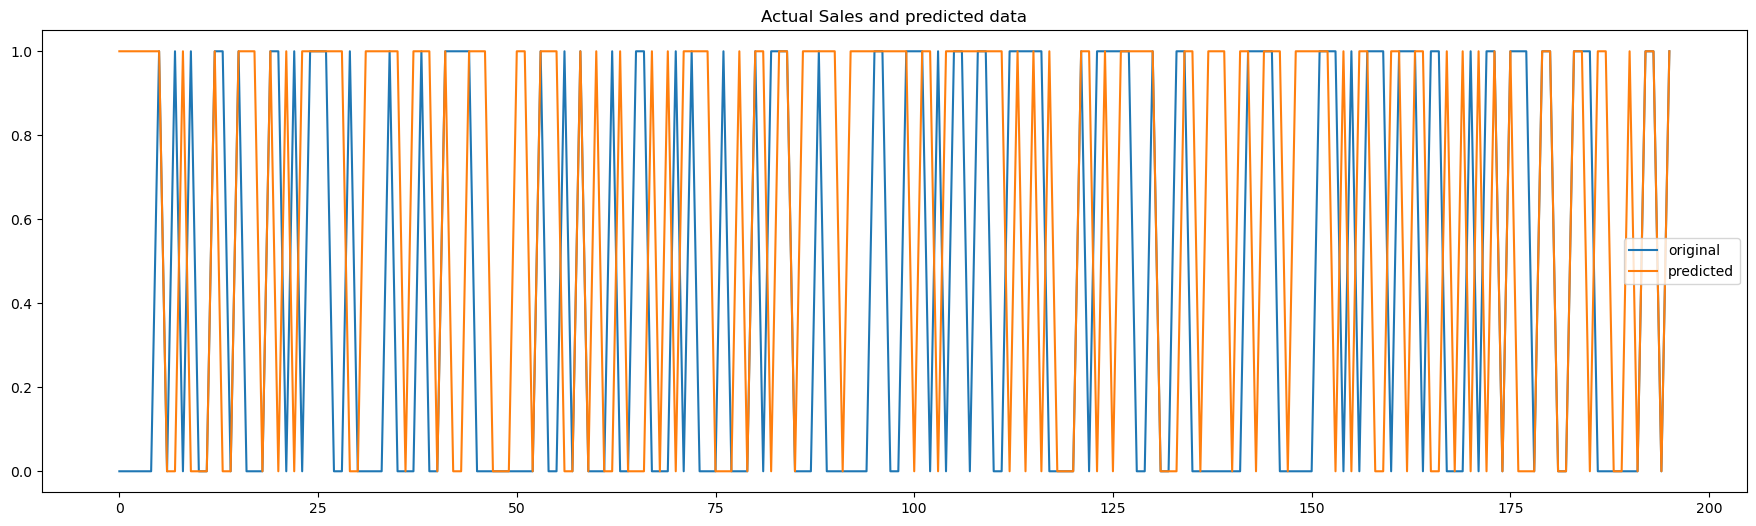

In [51]:
y3_pred=gnb.predict(x_test)
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y3_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y3_pred))
print("Training Score:\n",gnb.score(x_train,y_train)*100)
print("Test Score:\n",gnb.score(x_test,y_test)*100)
auc = metrics.roc_auc_score(y_test, y3_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y3_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for NAIVE BAYES")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.figure(figsize=(22,6))

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax,y3_pred, label="predicted")
plt.title("Actual Sales and predicted data")
plt.legend()




## 4. DECISION TREE CLASSIFIER

In [52]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

Classification Report is:
               precision    recall  f1-score   support

           0       0.49      0.32      0.39       109
           1       0.41      0.59      0.48        87

    accuracy                           0.44       196
   macro avg       0.45      0.45      0.44       196
weighted avg       0.46      0.44      0.43       196

Confusion Matrix:
 [[35 74]
 [36 51]]
Training Score:
 66.19897959183673
Test Score:
 43.87755102040816


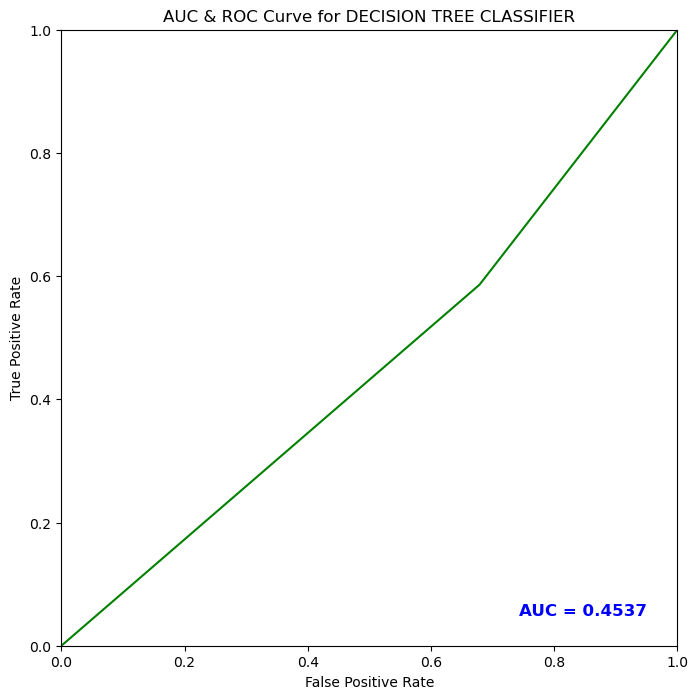

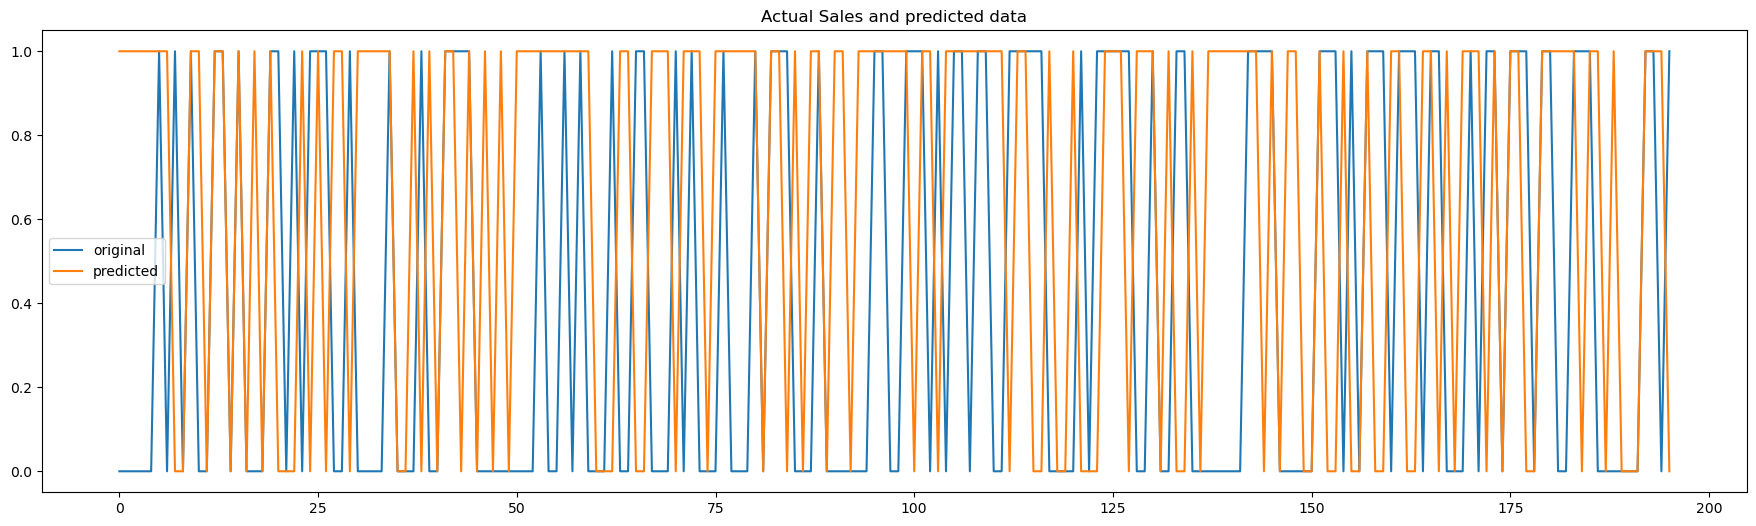

In [53]:
y4_pred=dtree.predict(x_test)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y4_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y4_pred))
print("Training Score:\n",dtree.score(x_train,y_train)*100)
print("Test Score:\n",dtree.score(x_test,y_test)*100)
auc = metrics.roc_auc_score(y_test, y4_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y4_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for DECISION TREE CLASSIFIER")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")



plt.figure(figsize=(22,6))

x_ax = range(len(y_test))

plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax,y4_pred, label="predicted")
plt.title("Actual Sales and predicted data")
plt.legend()






In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

Classification Report is:
               precision    recall  f1-score   support

           0       0.57      0.48      0.52       109
           1       0.46      0.55      0.50        87

    accuracy                           0.51       196
   macro avg       0.51      0.51      0.51       196
weighted avg       0.52      0.51      0.51       196

Confusion Matrix:
 [[52 57]
 [39 48]]
Training Score:
 100.0
Test Score:
 46.42857142857143


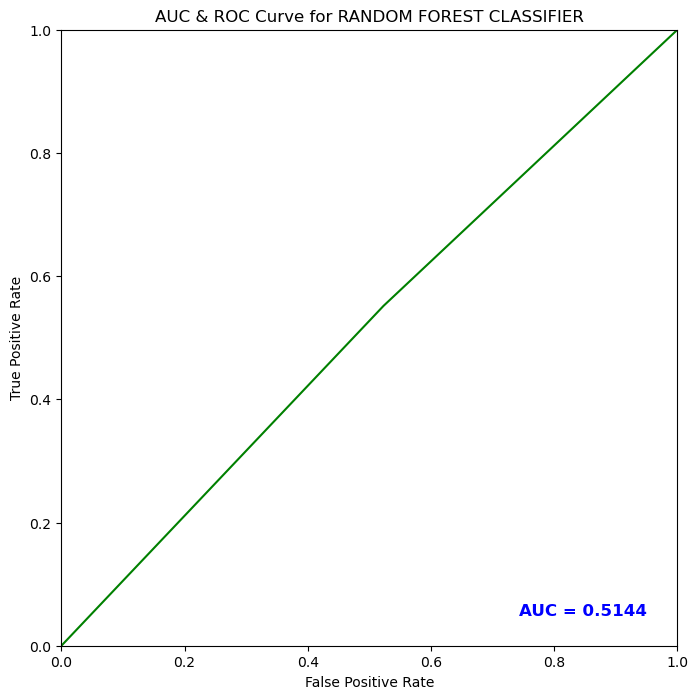

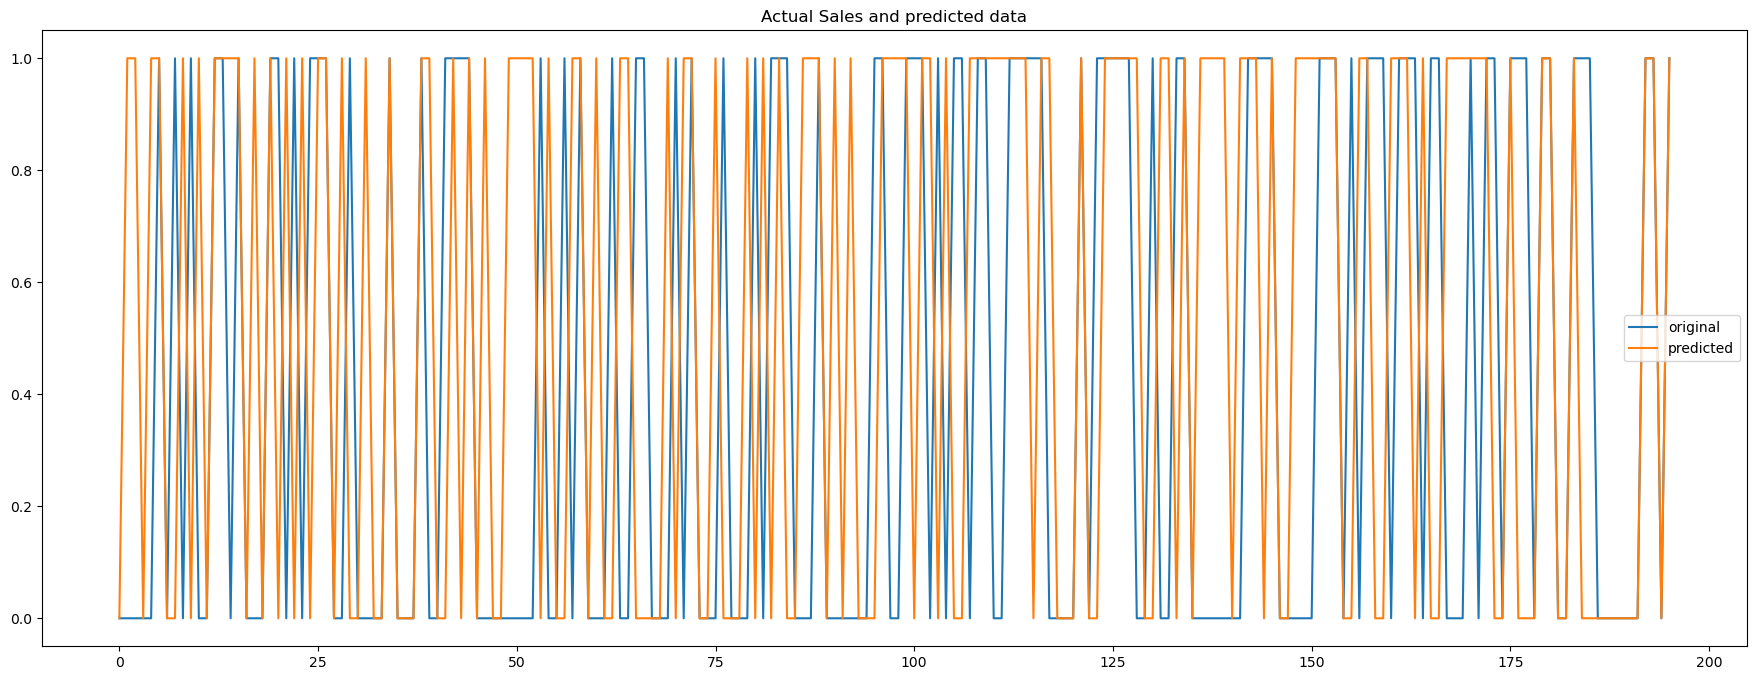

In [55]:
y5_pred=rfc.predict(x_test)
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y5_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y5_pred))
print("Training Score:\n",rfc.score(x_train,y_train)*100)
print("Test Score:\n",knn.score(x_test,y_test)*100)
auc = metrics.roc_auc_score(y_test, y5_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y5_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for RANDOM FOREST CLASSIFIER")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


plt.figure(figsize=(22,8))

x_ax = range(len(y_test))

plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax,y5_pred, label="predicted")
plt.title("Actual Sales and predicted data")
plt.legend()
plt.show()




## EXTRATREES CLASSIFIER

In [56]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(x_train,y_train)

ExtraTreesClassifier(random_state=0)

Classification Report is:
               precision    recall  f1-score   support

           0       0.59      0.50      0.54       109
           1       0.47      0.55      0.51        87

    accuracy                           0.53       196
   macro avg       0.53      0.53      0.52       196
weighted avg       0.53      0.53      0.53       196

Confusion Matrix:
 [[55 54]
 [39 48]]
Training Score:
 100.0
Test Score:
 52.55102040816326


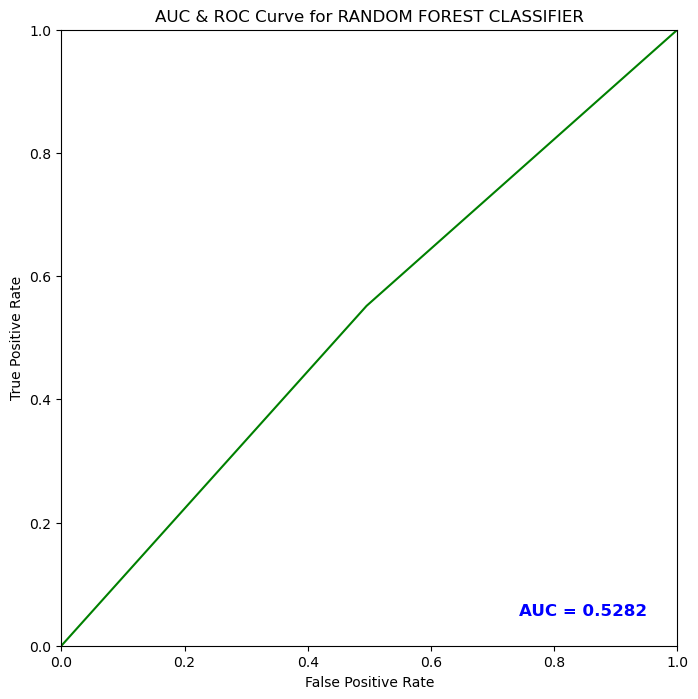

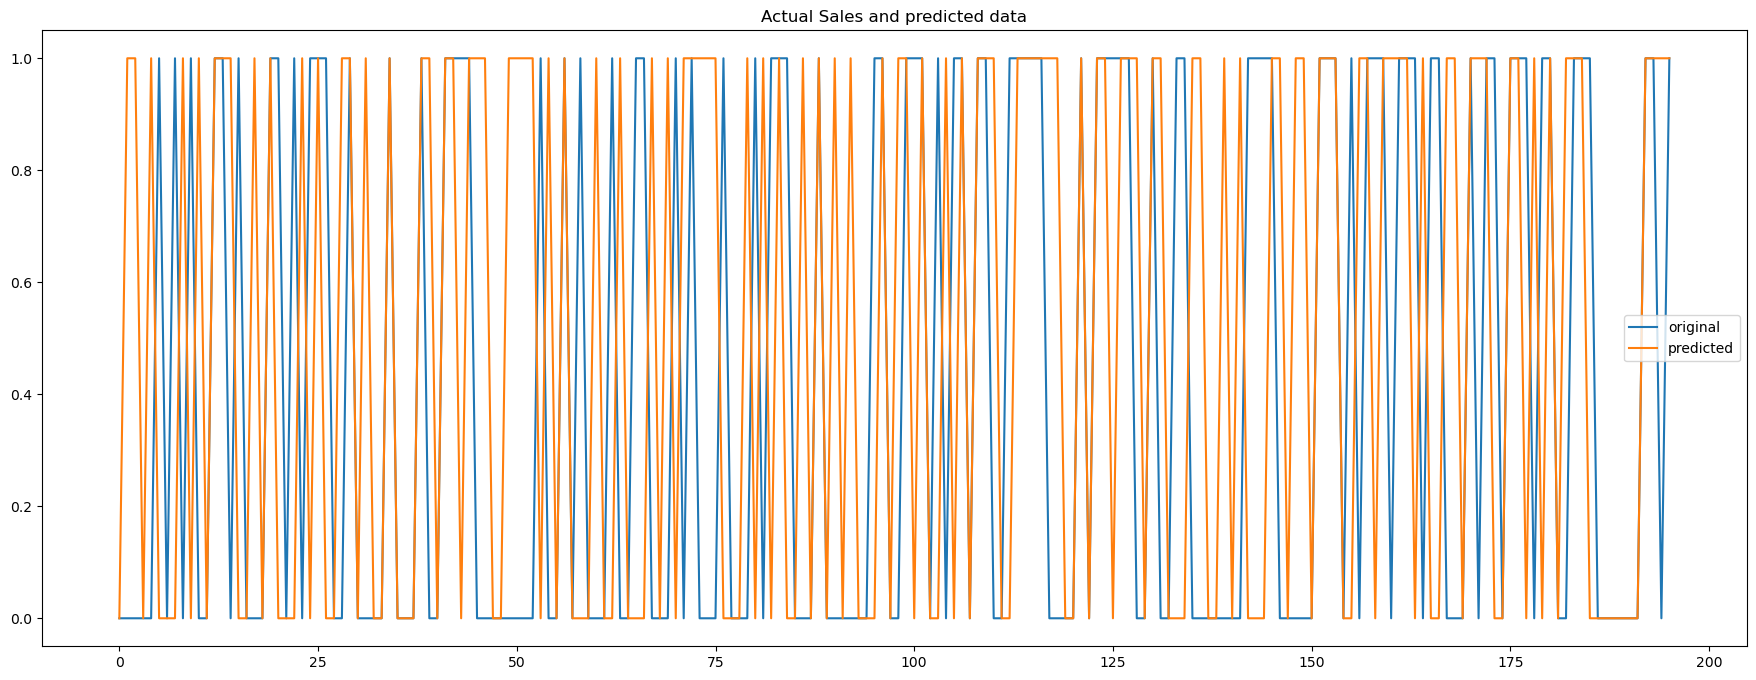

Actual  Predicted
452       0          0
421       0          1
338       0          1
640       0          0
592       0          1
..      ...        ...
37        0          0
659       1          1
894       1          1
834       0          1
162       1          1

[196 rows x 2 columns]

In [59]:
y6_pred=etc.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y6_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y6_pred))
print("Training Score:\n",etc.score(x_train,y_train)*100)
print("Test Score:\n",etc.score(x_test,y_test)*100)

auc = metrics.roc_auc_score(y_test, y6_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y6_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for RANDOM FOREST CLASSIFIER")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")


plt.figure(figsize=(22,8))

x_ax = range(len(y_test))

plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax,y6_pred, label="predicted")
plt.title("Actual Sales and predicted data")
plt.legend()
plt.show()

new2_data = pd.DataFrame({'Actual': y_test, 'Predicted': y6_pred})
new2_data


## AUC-ROC CURVE FOR TRAINING

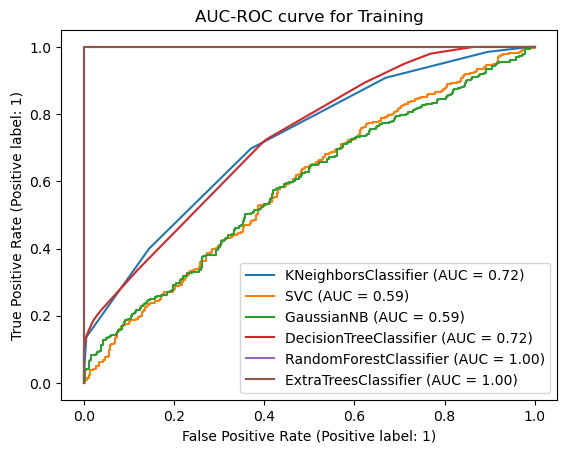

In [60]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(knn,x_train,y_train)
plot_roc_curve(svc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(gnb,x_train,y_train,ax=disp.ax_)
plot_roc_curve(dtree,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rfc,x_train,y_train,ax=disp.ax_)
plot_roc_curve(etc,x_train,y_train,ax=disp.ax_)
plt.title('AUC-ROC curve for Training')
plt.show()

## AUC-ROC CURVE FOR TESTING

In [61]:
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gnb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtree,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(etc,x_test,y_test,ax=disp.ax_)
plt.title('AUC-ROC curve for Testing')
plt.show()

## ACTUAL VS PREDICTED COMPARISON BETWEEN CLASSIFIERS

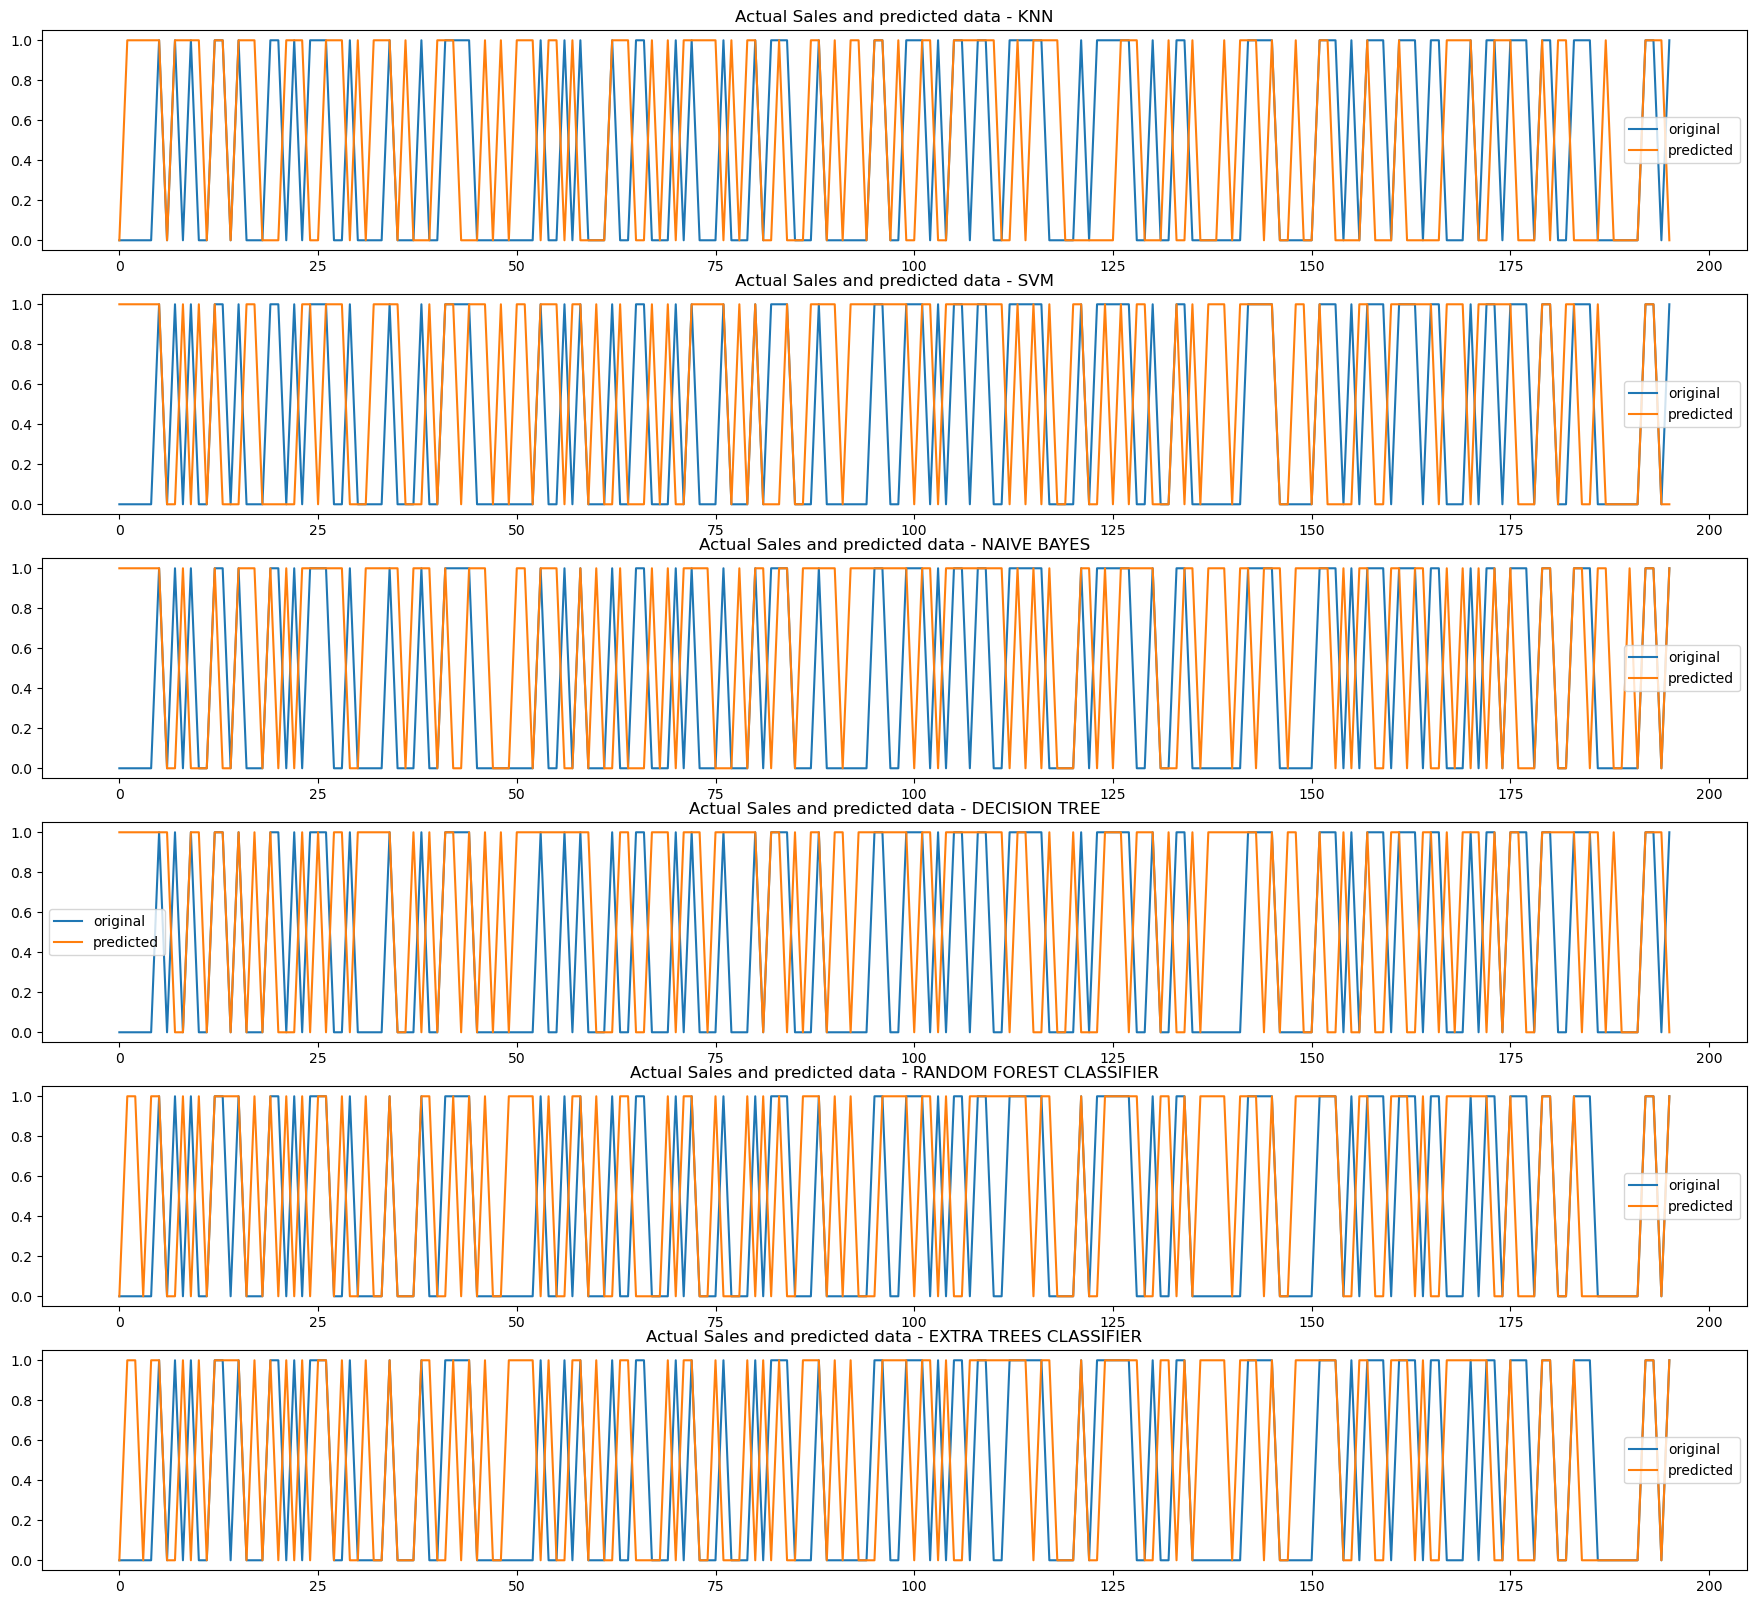

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,20))
plt.ylim(-2,2)
x_ax = range(len(y_test))

plt.subplot(6,1,1)
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax,y1_pred, label="predicted")
plt.title("Actual Sales and predicted data - KNN")
plt.legend()

plt.subplot(6,1,2)
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax,y2_pred, label="predicted")
plt.title("Actual Sales and predicted data - SVM")
plt.legend()

plt.subplot(6,1,3)
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax,y3_pred, label="predicted")
plt.title("Actual Sales and predicted data - NAIVE BAYES")
plt.legend()

plt.subplot(6,1,4)
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax,y4_pred, label="predicted")
plt.title("Actual Sales and predicted data - DECISION TREE")
plt.legend()

plt.subplot(6,1,5)
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax,y5_pred, label="predicted")
plt.title("Actual Sales and predicted data - RANDOM FOREST CLASSIFIER")
plt.legend()

plt.subplot(6,1,6)
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax,y5_pred, label="predicted")
plt.title("Actual Sales and predicted data - EXTRA TREES CLASSIFIER")
plt.legend()

plt.show()

